In [21]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [3]:
all_files = glob.glob('./my*.xls')
all_files

['.\\myCabinetExcelData (1).xls',
 '.\\myCabinetExcelData (2).xls',
 '.\\myCabinetExcelData (3).xls',
 '.\\myCabinetExcelData (4).xls',
 '.\\myCabinetExcelData (5).xls',
 '.\\myCabinetExcelData (6).xls',
 '.\\myCabinetExcelData (7).xls',
 '.\\myCabinetExcelData (8).xls',
 '.\\myCabinetExcelData (9).xls',
 '.\\myCabinetExcelData.xls']

## 파일 하나를 읽어서 df에 넣음. df를 리스트에 누적!

In [4]:
all_files_data = [] # [df, df, df ~~]

In [6]:
for file in all_files :
    df = pd.read_excel(file)
    all_files_data.append(df)
len(all_files_data)

10

In [13]:
all_files_data[:1]

[    Unnamed: 0   번호                                                 제목  \
 0          NaN    1        Clustering Big Spatiotemporal-Interval Data   
 1          NaN    2            Intelligent big data analysis: a review   
 2          NaN    3  Improved big data stock index prediction using...   
 3          NaN    4    Guest Editorial: Big Data Analytics and the Web   
 4          NaN    5    Guest Editorial: Big Data Analytics and the Web   
 ..         ...  ...                                                ...   
 95         NaN   96  A Detailed Review on the Prominent Compression...   
 96         NaN   97  A Survey on Data Collection for Machine Learni...   
 97         NaN   98  An overview of online based platforms for shar...   
 98         NaN   99  Divide and recombine (D&R) data science projec...   
 99         NaN  100  The Gamma Matrix to Summarize Dense and Sparse...   
 
                                                    저자  \
 0   Shao, W.; Salim, F. D.; Song, A.; B

In [11]:
all_files_data_concat = pd.concat(all_files_data,
                                  axis=0, # row 병합
                                  ignore_index=True
                                 )
all_files_data_concat[:5]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Clustering Big Spatiotemporal-Interval Data,"Shao, W.; Salim, F. D.; Song, A.; Bouguettaya, A.",unknown,2016
1,NaN,2,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2015
2,NaN,3,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
3,NaN,4,Guest Editorial: Big Data Analytics and the Web,"Sheng, Q. Z.; Vasilakos, A. V.; Yu, Q.; Yao, L.",unknown,2015
4,NaN,5,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016


In [14]:
all_files_data_concat.tail(2)

,Unnamed: 0,번호,제목,저자,출판사,출판일
998,NaN,99,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
999,NaN,100,Agile Big Data Analytics for Web-Based Systems...,"Chen, H.; Kazman, R.; Haziyev, S.",unknown,2016


In [16]:
all_files_data_concat.describe()

,Unnamed: 0,번호,출판일
count,0.0,1000.000000,1000.000000
mean,NaN,50.500000,2016.528000
std,NaN,28.880514,2.611137
min,NaN,1.000000,1995.000000
25%,NaN,25.750000,2015.000000
50%,NaN,50.500000,2017.000000
75%,NaN,75.250000,2018.000000
max,NaN,100.000000,2021.000000


In [17]:
all_files_data_concat.to_csv('./riss_bigdata.csv', encoding='utf-8', index=False)

In [18]:
df1000 = pd.read_csv('./riss_bigdata.csv', encoding='utf-8')
df1000[:3]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Clustering Big Spatiotemporal-Interval Data,"Shao, W.; Salim, F. D.; Song, A.; Bouguettaya, A.",unknown,2016
1,NaN,2,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2015
2,NaN,3,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021


## 전처리

In [19]:
#제목 추출
all_titles = df1000['제목']
all_titles[:5]

0          Clustering Big Spatiotemporal-Interval Data
1              Intelligent big data analysis: a review
2    Improved big data stock index prediction using...
3      Guest Editorial: Big Data Analytics and the Web
4      Guest Editorial: Big Data Analytics and the Web
Name: 제목, dtype: object

In [22]:
stopwords = set(stopwords.words('english'))

In [24]:
lemma = WordNetLemmatizer() # fly, flies, flied ==> fly

### 1. 글자만 추출(글자가 아닌 것은 공백으로 replace)
### 2. 분석에 사용하지 않을 글자들을 제거(불용어 처리)
### 3. 표제어 추출

In [25]:
words = [] # 전처리한 결과를 모으는 리스트

In [30]:
for title in all_titles[0:1]:
    # 1. 전처리1, 글자가 아닌 것은 공백으로 대체
    pre1 = re.sub(r"[^a-zA-Z]+", " ", str(title))
    # 2. 소문자로 변경하여 단어를 토큰으로 만들기
    pre1_lower_token = word_tokenize(pre1.lower())
    print(pre1_lower_token)
    # 3. 전처리2, 불용어 처리
    pre2 = [w for w in pre1_lower_token if w not in stopwords]
    print(pre2)
    # 4. 표제어 추출
    pre3 = [lemma.lemmatize(w) for w in pre2]
    print(pre3)

['clustering', 'big', 'spatiotemporal', 'interval', 'data']
['clustering', 'big', 'spatiotemporal', 'interval', 'data']
['clustering', 'big', 'spatiotemporal', 'interval', 'data']


In [33]:
for title in all_titles:
    # 1. 전처리1, 글자가 아닌 것은 공백으로 대체
    pre1 = re.sub(r"[^a-zA-Z]+", " ", str(title))
    # 2. 소문자로 변경하여 단어를 토큰으로 만들기
    pre1_lower_token = word_tokenize(pre1.lower())
    # print(pre1_lower_token)
    # 3. 전처리2, 불용어 처리
    pre2 = [w for w in pre1_lower_token if w not in stopwords]
    # print(pre2)
    # 4. 표제어 추출
    pre3 = [lemma.lemmatize(w) for w in pre2]
    # print(pre3)
    words.append(pre3)

In [35]:
words[:5]

[['clustering', 'big', 'spatiotemporal', 'interval', 'data'],
 ['intelligent', 'big', 'data', 'analysis', 'review'],
 ['improved',
  'big',
  'data',
  'stock',
  'index',
  'prediction',
  'using',
  'deep',
  'learning',
  'cnn',
  'gru'],
 ['guest', 'editorial', 'big', 'data', 'analytics', 'web'],
 ['guest', 'editorial', 'big', 'data', 'analytics', 'web']]

In [36]:
len(words)

1000

In [37]:
reduce(lambda x, y : x + y, words[:5]) # 결과가 list
# 여러개의 리스트를 하나로 합하고 싶을 때(요약하고 싶을 때)

['clustering',
 'big',
 'spatiotemporal',
 'interval',
 'data',
 'intelligent',
 'big',
 'data',
 'analysis',
 'review',
 'improved',
 'big',
 'data',
 'stock',
 'index',
 'prediction',
 'using',
 'deep',
 'learning',
 'cnn',
 'gru',
 'guest',
 'editorial',
 'big',
 'data',
 'analytics',
 'web',
 'guest',
 'editorial',
 'big',
 'data',
 'analytics',
 'web']

In [39]:
words2 = reduce(lambda x, y : x + y, words)
print(type(words2))
words2[:10]

<class 'list'>


['clustering',
 'big',
 'spatiotemporal',
 'interval',
 'data',
 'intelligent',
 'big',
 'data',
 'analysis',
 'review']

In [40]:
count = Counter(words2)
count

Counter({'clustering': 9,
         'big': 1119,
         'spatiotemporal': 1,
         'interval': 3,
         'data': 1250,
         'intelligent': 13,
         'analysis': 79,
         'review': 25,
         'improved': 5,
         'stock': 4,
         'index': 6,
         'prediction': 19,
         'using': 62,
         'deep': 9,
         'learning': 41,
         'cnn': 1,
         'gru': 1,
         'guest': 13,
         'editorial': 16,
         'analytics': 93,
         'web': 10,
         'infrastructure': 10,
         'scholar': 3,
         'discovery': 13,
         'collaboration': 6,
         'speed': 1,
         'unveiling': 1,
         'storage': 9,
         'distribution': 10,
         'sub': 1,
         'datasets': 2,
         'petuum': 1,
         'new': 43,
         'platform': 28,
         'distributed': 19,
         'machine': 21,
         'kvasir': 1,
         'scalable': 14,
         'provision': 2,
         'semantically': 2,
         'relevant': 1,
         'cont

In [43]:
count.most_common(3) # 높은 순으로

[('data', 1250), ('big', 1119), ('analytics', 93)]

## 빈도수가 5이하인 것은 목록에서 제거해버리기

In [44]:
count.most_common(2)

[('data', 1250), ('big', 1119)]

In [45]:
for one in count.most_common(2) :
    print(one) # one이 tuple

('data', 1250)
('big', 1119)


In [47]:
for tag, counts in count.most_common(2) :
    print(tag, ',', counts)

data , 1250
big , 1119


In [49]:
word_count = dict()
for tag, counts in count.most_common(2) :
    if(counts > 50) :
        word_count[tag] = counts # 'data' : 1250
print(word_count)

{'data': 1250, 'big': 1119}


In [51]:
word_count = dict()
for tag, counts in count.most_common(50) :
    if(counts > 30) : # 빈도수가 30 이상인 것만 추출
        word_count[tag] = counts # 'data' : 1250
print(word_count)

{'data': 1250, 'big': 1119, 'analytics': 93, 'based': 87, 'analysis': 79, 'using': 62, 'driven': 58, 'approach': 53, 'challenge': 51, 'system': 49, 'model': 44, 'new': 43, 'learning': 41, 'application': 38, 'science': 37, 'framework': 33, 'health': 33, 'management': 32, 'opportunity': 31, 'research': 31}


In [52]:
## 너무 주제와 일치하는 단어는 dict에서 제거해버리자
del word_count['big']
del word_count['data']

In [55]:
word_count

{'analytics': 93,
 'based': 87,
 'analysis': 79,
 'using': 62,
 'driven': 58,
 'approach': 53,
 'challenge': 51,
 'system': 49,
 'model': 44,
 'new': 43,
 'learning': 41,
 'application': 38,
 'science': 37,
 'framework': 33,
 'health': 33,
 'management': 32,
 'opportunity': 31,
 'research': 31}

In [56]:
word_count.values()

dict_values([93, 87, 79, 62, 58, 53, 51, 49, 44, 43, 41, 38, 37, 33, 33, 32, 31, 31])

In [57]:
sorted_wc = sorted(word_count.values(), reverse=True)
sorted_wc

[93, 87, 79, 62, 58, 53, 51, 49, 44, 43, 41, 38, 37, 33, 33, 32, 31, 31]

<function matplotlib.pyplot.show(*args, **kw)>

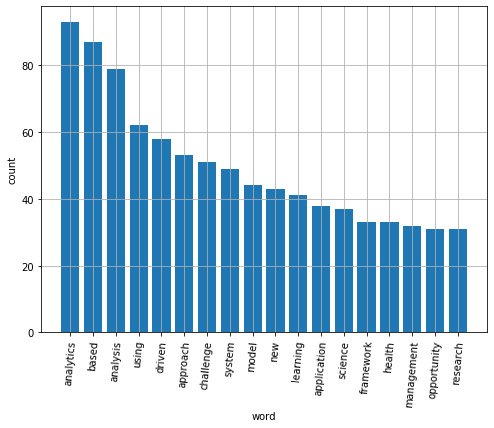

In [61]:
plt.figure(figsize=(8,6))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

plt.bar(range(len(word_count)), word_count.values())
plt.xticks(range(len(word_count)), word_count.keys(), rotation='85')66
plt.show